In [1]:
#google drive

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Menginstall keras versi 2.4.3 karena jika menggunakan keras terbaru maka BatchNormalization tidak bisa jalan

In [2]:
!pip install keras==2.4.3

**Import Library**

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers


from keras.layers.normalization import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils.np_utils import to_categorical

from keras.datasets import mnist
import os

from keras.utils.vis_utils import plot_model #plot model

Membaca Dataset yang berada di Gdrive

In [4]:
#lokasi baca file
train = pd.read_csv('gdrive/My Drive/dataset2/train.csv')
test = pd.read_csv('gdrive/My Drive/dataset2/test.csv')

print("Data oke!!")

Data oke!!


In [5]:
X = train.drop(['label'], 1).values
y = train['label'].values

test_x = test.values

In [6]:
X = X / 255.0
test_x = test_x / 255.0

X = X.reshape(-1,28,28,1)
test_x = test_x.reshape(-1,28,28,1)

y = to_categorical(y)

print(f"Label size {y.shape}")

Label size (42000, 10)


**Split data training dan data validation set **

In [7]:
# Split the train and the validation set for the fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600, 10), (8400, 10))

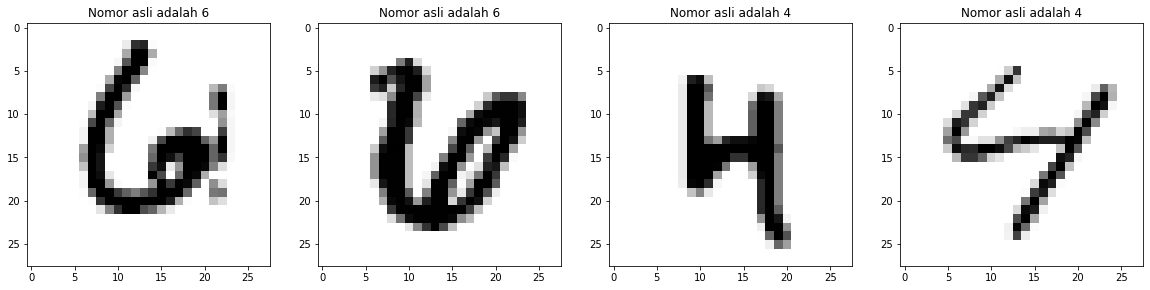

In [9]:
X_train__ = X_train.reshape(X_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Nomor asli adalah {digit}");

In [10]:
mean = np.mean(X_train)
std = np.std(X_train)

def standardize(x):
    return (x-mean)/std

epochs = 50
batch_size = 64

**Model Yang digunakan**

In [11]:
model=Sequential()

   
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    
model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
    
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,activation="relu"))
    
model.add(Dense(10,activation="softmax"))
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

**With data augmentation to prevent overfitting**

In [12]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(X_test, y_test, batch_size=batch_size)

**Pemodelan Training**

Model Fit

In [13]:
# Fit the model
history = model.fit_generator(train_gen, 
                              epochs = 50, 
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              validation_data = test_gen,
                              validation_steps = X_test.shape[0] // batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
525/525 [==============================] - 16s 24ms/step - loss: 0.1593 - accuracy: 0.9504 - val_loss: 0.2207 - val_accuracy: 0.9270
Epoch 2/50
525/525 [==============================] - 13s 24ms/step - loss: 0.0749 - accuracy: 0.9776 - val_loss: 0.0902 - val_accuracy: 0.9760
Epoch 3/50
525/525 [==============================] - 13s 24ms/step - loss: 0.0576 - accuracy: 0.9825 - val_loss: 0.0716 - val_accuracy: 0.9801
Epoch 4/50
525/525 [==============================] - 13s 24ms/step - loss: 0.0496 - accuracy: 0.9851 - val_loss: 0.0476 - val_accuracy: 0.9859
Epoch 5/50
525/525 [==============================] - 13s 24ms/step - loss: 0.0477 - accuracy: 0.9857 - val_loss: 0.0394 - val_accuracy: 0.9884
Epoch 6/50
525/525 [==============================] - 13s 24ms/step - loss: 0.0387 - accuracy: 0.9882 - val_loss: 0.0386 - val_accuracy: 0.9877
Epoch 7/50
525/525 [==============================] - 13s 24ms/step - loss: 0.0361 - accuracy: 0.9889 - val_loss: 0.0498 - val_accuracy:

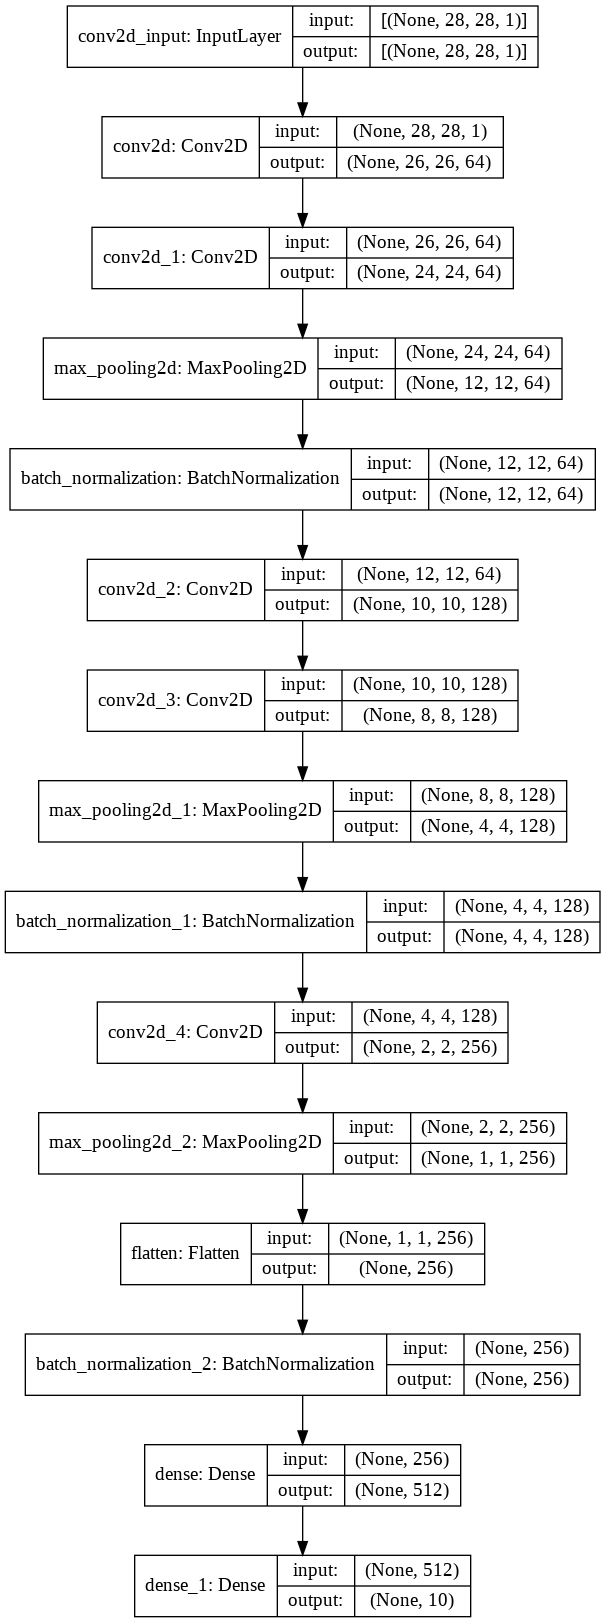

In [14]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**Evaluasi Model yang telah dibuat**

**Kurva Hasil Training dan Validasi**

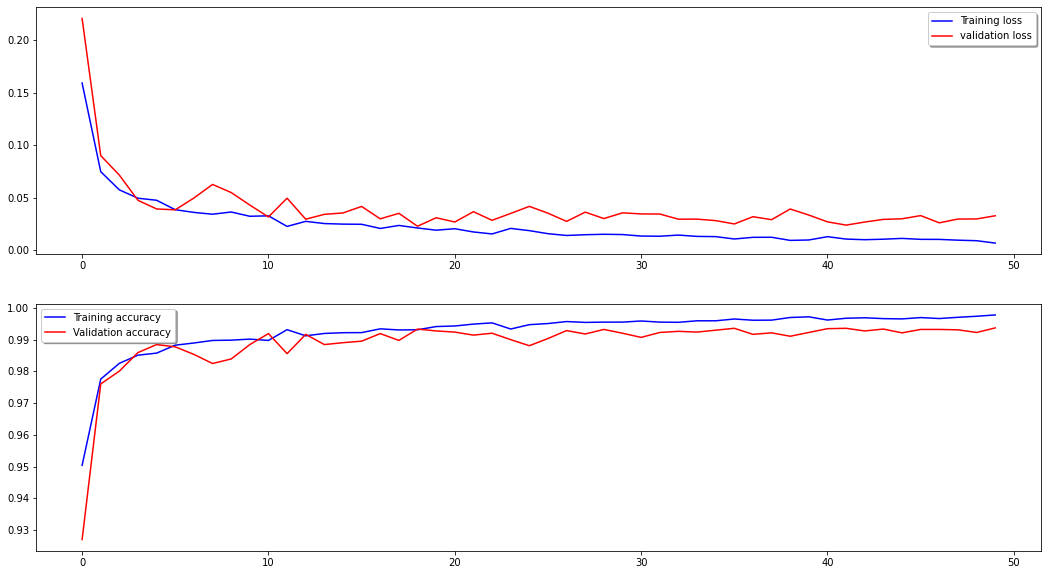

In [15]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

**Confusion Matrix**

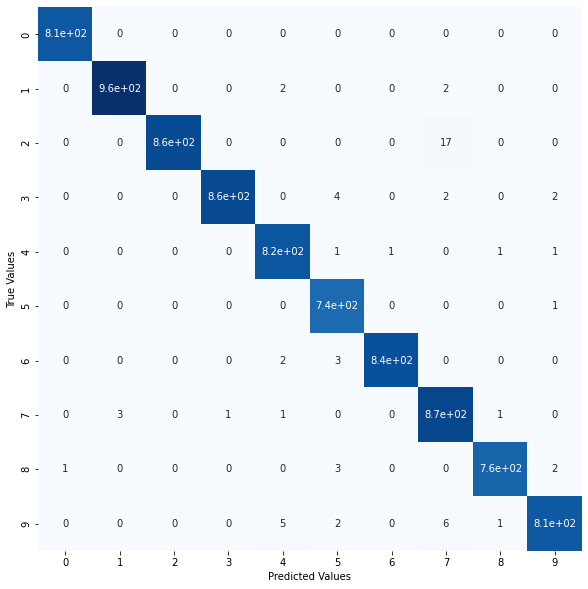

In [16]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(X_test) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

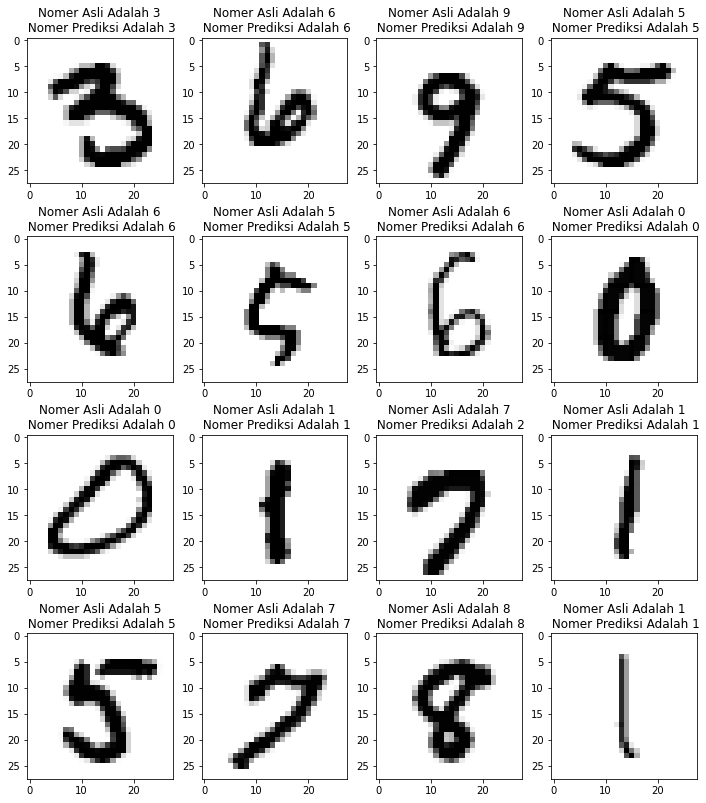

In [17]:
y_pred = model.predict(X_test)
X_test__ = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Nomer Asli Adalah {y_test[i].argmax()}\n Nomer Prediksi Adalah {y_pred[i].argmax()}");